In [1]:
import math
import numpy as np
from mpmath import khinchin

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style ='darkgrid')
from random import random

In [2]:
def geometric_mean(x):
    n = len(x)
    v = 1
    for elem in x:
        v *= elem
    return v**(1/n)

In [3]:
def cf(n, d):
    """Renvoies les termes de la fraction continue du numérateur n et du dénominateur d"""
    if d == 0: return []         
    q = n//d                     
    r = n - q*d                  
    return [q] + cf(d, r)

In [4]:
# Valeurs particulières
racine_2 = cf(np.sqrt(2), 1)
e = cf(np.exp(1), 1)
pi = cf(np.pi, 1)

# On prend 5 réels aléatoires
r1, r2, r3, r4, r5 = cf(random()*100, 1),\
cf(random()*100, 1), cf(random()*100, 1), cf(random()*100, 1), cf(random()*100, 1)

# On limite aux 25 premiers chiffres
pi = pi[:25]
e = e[:25]
racine_2 = racine_2[:25]
k = [khinchin] * 25

r1 = r1[:25]
r2 = r2[:25]
r3 = r3[:25]
r4 = r4[:25]
r5 = r5[:25]

In [5]:
geom_pi = list()
geom_e = list()
geom_r = list()
geom_r1 = list()
geom_r2 = list()
geom_r3 = list()
geom_r4 = list()
geom_r5 = list()
c = list()

for i in range(1, len(pi)):
    geom_pi.append(geometric_mean(pi[:i]))
    geom_e.append(geometric_mean(e[:i]))
    geom_r.append(geometric_mean(racine_2[:i]))
    geom_r1.append(geometric_mean(r1[:i]))
    geom_r2.append(geometric_mean(r2[:i]))
    geom_r3.append(geometric_mean(r3[:i]))
    geom_r4.append(geometric_mean(r4[:i]))
    geom_r5.append(geometric_mean(r5[:i]))
    c.append(i-1)

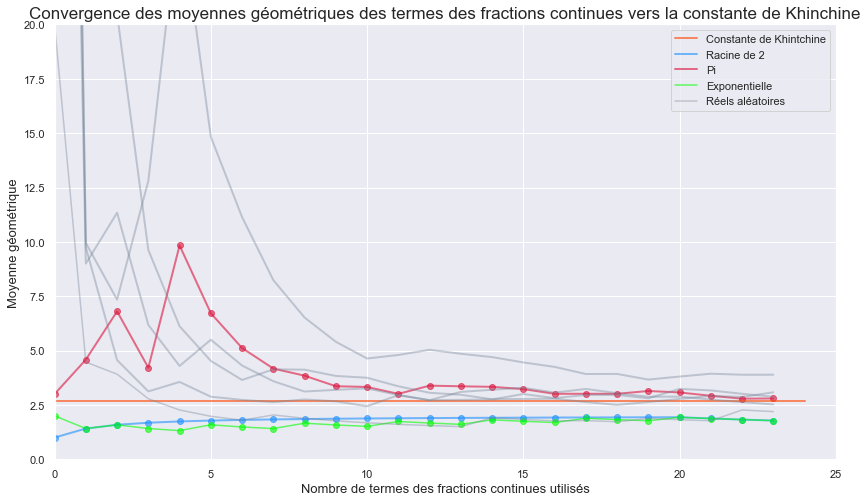

In [6]:
plt.figure(figsize = (14, 8))

plt.title('')
plt.plot(k, label = 'Constante de Khintchine', color = 'orangered', lw = 2, alpha = .6)
plt.plot(geom_r, label = 'Racine de 2', color = 'dodgerblue', lw = 2, alpha = .6)
plt.scatter(c, geom_r, color = 'dodgerblue', alpha = .6)
plt.plot(geom_pi, label = 'Pi', color = 'crimson', alpha = .6, lw = 2)
plt.scatter(c, geom_pi, color = 'crimson', alpha = .6)
plt.plot(geom_e, label = 'Exponentielle', color = 'lime', alpha = .6)
plt.scatter(c, geom_e, color = 'lime', alpha = .6)

plt.plot(geom_r1, label = 'Réels aléatoires', color = 'lightslategrey', alpha = .4)
plt.plot(geom_r2, color = 'lightslategrey', alpha = .4,  lw = 2)
plt.plot(geom_r3, color = 'lightslategrey', alpha = .4,  lw = 2)
plt.plot(geom_r4, color = 'lightslategrey', alpha = .4,  lw = 2)
plt.plot(geom_r5, color = 'lightslategrey', alpha = .4,  lw = 2)

plt.title('Convergence des moyennes géométriques des termes des fractions continues vers la constante de Khinchine', fontsize = 17)
plt.xlabel('Nombre de termes des fractions continues utilisés', fontsize = 13)
plt.ylabel('Moyenne géométrique', fontsize = 13)
plt.axis([0, len(e), 0, 20])
plt.legend()
plt.show()